# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху:
$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        
        return np.linalg.norm(X.dot(w) - y) ** 2 / y.shape[0]
        # 
    
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        
        return X.T.dot(X.dot(w) - y) * 2 / y.shape[0]
        
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_features,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    trace = []
    w = w_init
    trace.append(w)
    
    for _ in range(n_iterations):
        w = w - lr * loss.calc_grad(X, y, w)
        trace.append(w)
        
    return trace
    

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045026
0.8670644395649494


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, title: str = "GD trajectory"):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title(title)
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

Gradient value = [16.67635709 72.78906566]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


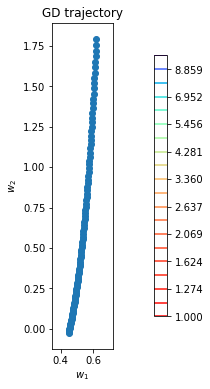

Gradient value = [4.26261134 0.03249655]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


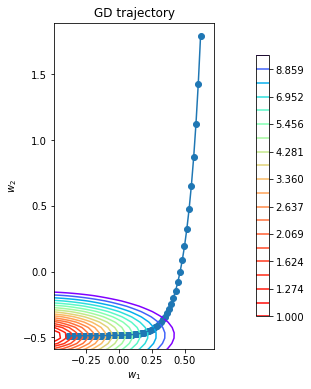

Gradient value = [1.11249937e-06 8.47853930e-09]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


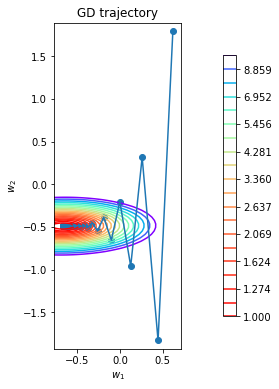

Gradient value = [-7.28544017e+117  9.55948280e+119]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


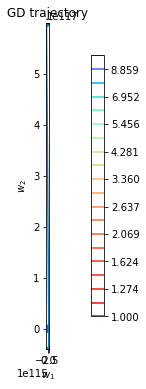

In [9]:
loss = MSELoss()

for ss in [0.0001, 0.001, 0.01, 0.1]:
    w_list = gradient_descent(w_init, X, y, loss, ss, 100)
    print(f"Gradient value = {loss.calc_grad(X, y, w_list[-1])}")
    plot_gd(w_list, X, y, loss)

Получаем, что при различных `lr` градиентный спуск ведёт себя по-разному. 
* При наименьшем `lr`(=0.0001) градиентный спуск не доходит даже до изображённых линий уровня, т.е. за 100 шагов градиент не достигает нуля. 
* Значения `lr`(0.001 и 0.01) являются более оптимальными, т.к. с ними градиент находится достаточно близко к нулю. Хотя спуск при `lr`=0.001 происходит гораздо плавнее.
* `lr`= 0.1 не позволяет градиентному спуску спускаться, лишь отдаляя значение градиента. (на 100-й итерации в точках присутствует множитель 10^115). С точки зрения графика, построить его корректно не удаётся из-за непропорциональных значений.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

**Источник**:
> https://github.com/V-Marco/hse_iad4_2022/blob/main/seminar_7/solved_sem07_grad.ipynb

In [16]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """    
        
    trace = []
    w = w_init
    trace.append(w)
    
    for _ in range(n_iterations):
        sample = np.random.randint(n_objects, size=batch_size)
        w = w - lr * loss.calc_grad(X[sample], y[sample], w)
        trace.append(w)
        
    return trace    

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

In [11]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


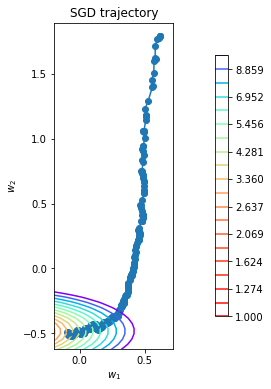

lr = 0.0001 || batch_size = 1 || Gradient value = [ 8.82998461 -1.22729531]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


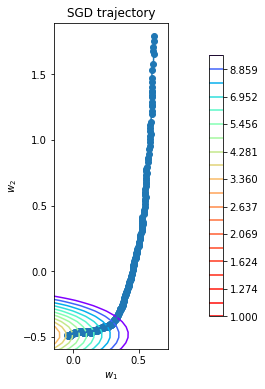

lr = 0.0001 || batch_size = 5 || Gradient value = [ 9.63366639 -0.15043529]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


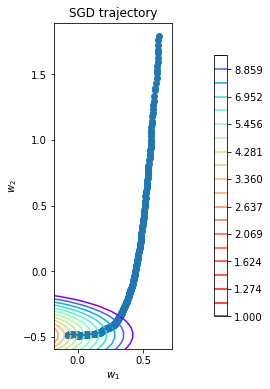

lr = 0.0001 || batch_size = 20 || Gradient value = [9.08564202 0.19173642]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


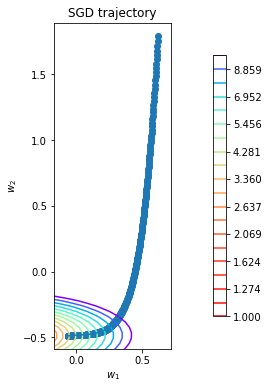

lr = 0.0001 || batch_size = 200 || Gradient value = [ 9.25746111 -0.33030464]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


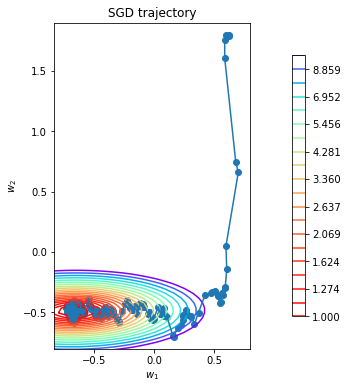

lr = 0.001 || batch_size = 1 || Gradient value = [ 0.08319576 -5.07726997]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


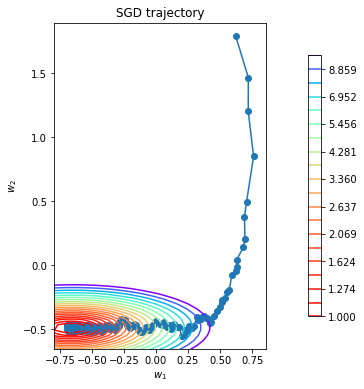

lr = 0.001 || batch_size = 5 || Gradient value = [-0.17186167  0.95341973]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


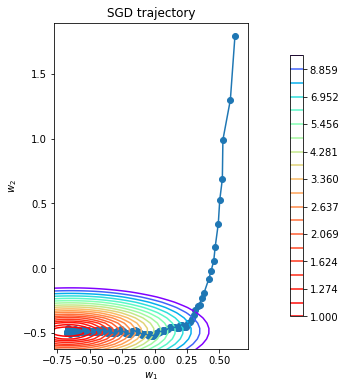

lr = 0.001 || batch_size = 20 || Gradient value = [-0.03082718  0.89119311]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


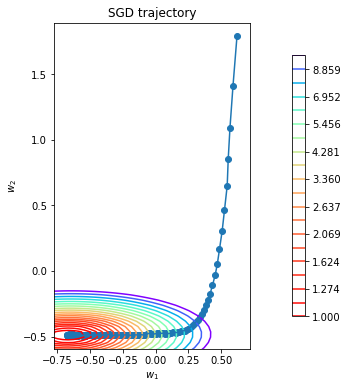

lr = 0.001 || batch_size = 200 || Gradient value = [-0.0395223  -0.34708185]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


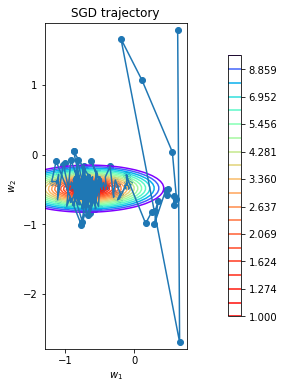

lr = 0.005 || batch_size = 1 || Gradient value = [ 1.34510435 -3.10811775]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


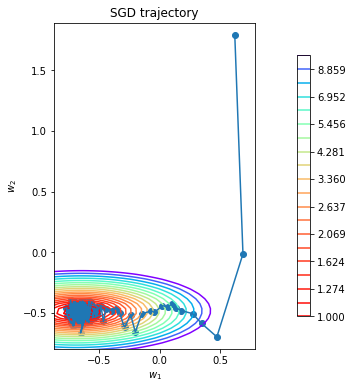

lr = 0.005 || batch_size = 5 || Gradient value = [-0.5869755   1.71731481]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


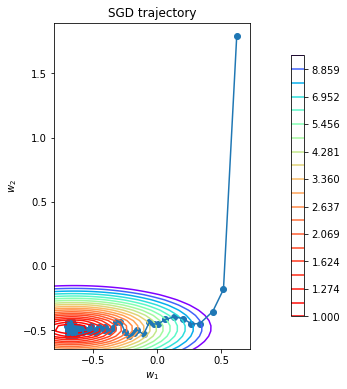

lr = 0.005 || batch_size = 20 || Gradient value = [ 0.13095674 -3.69097307]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


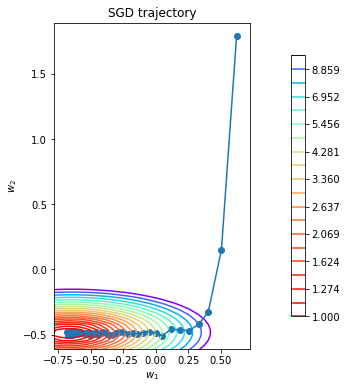

lr = 0.005 || batch_size = 200 || Gradient value = [-0.04479738  1.09669327]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


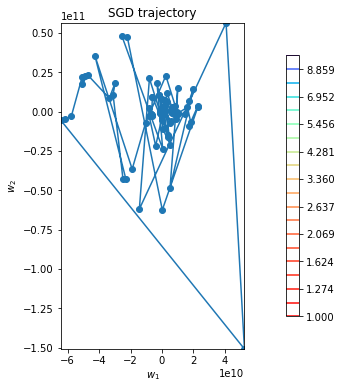

lr = 0.01 || batch_size = 1 || Gradient value = [ 2.44130672e+09 -8.25440016e+11]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


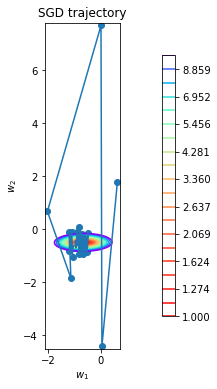

lr = 0.01 || batch_size = 5 || Gradient value = [ 0.43371762 -0.7139151 ]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


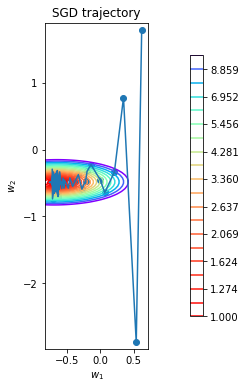

lr = 0.01 || batch_size = 20 || Gradient value = [ -0.21886661 -10.11332749]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


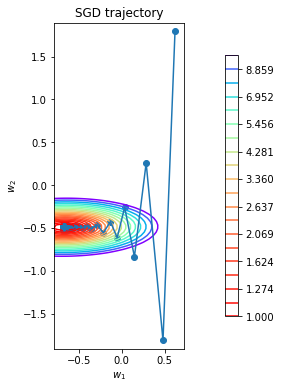

lr = 0.01 || batch_size = 200 || Gradient value = [-0.09117292 -2.55146307]


In [12]:
import itertools

loss = MSELoss()

lr_values = (0.0001, 0.001, 0.005, 0.01)
batch_values = (1, 5, 20, 200)

for lr, batch_size in itertools.product(lr_values, batch_values):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 500)
    plot_gd(w_list, X, y, loss, "SGD trajectory")
    print(f"{lr = } ||", f"{batch_size = } ||", f"Gradient value = {loss.calc_grad(X, y, w_list[-1])}")

Благодаря эксперименту выше мы убедились, что для успешной работы SGD необходим баланс между длиной шага и размером batch.

- При маленькой длине шага есть риск вообще не дойти до минимума функции потерь. Так, например, `lr`=0.0001 недостаточно для эффективного завершение градиентного спуска.
- Слишком большой `lr` приведёт к невозможности использовать градиентный спуск, т.к. большой шаг не позволит приблизить веса к оптимальным. 
- Что касается размера batch, чем больше в нём элементов, тем стабильнее идёт градиентный спуск. SGD не имеет смысла, если `batch_size == размеру выборки`

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [13]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    trace = []
    s0 = 1
    w = w_init
    trace.append(w)
    
    for i in range(n_iterations):
        sample = np.random.randint(n_objects, size=batch_size)
        lr = lr * np.power(s0/(s0 + i), p)
        w = w - lr * loss.calc_grad(X[sample], y[sample], w)
        trace.append(w)
        
    return trace 

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


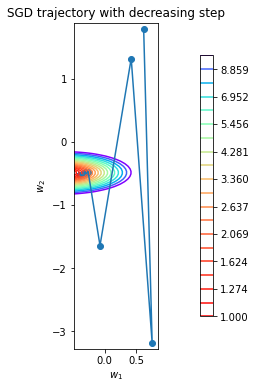

p = 0.1 || Gradient value = [ 4.37843414 -4.42283499]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


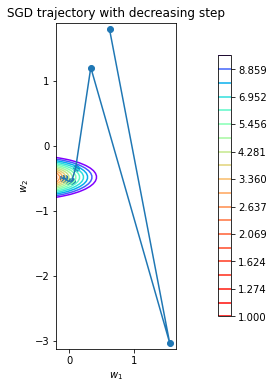

p = 0.2 || Gradient value = [ 8.77654455 -1.42487728]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


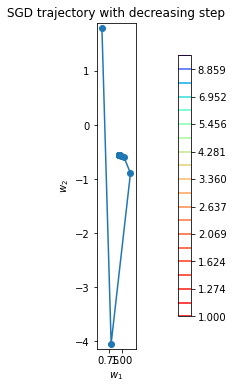

p = 0.5 || Gradient value = [ 24.64872402 -10.77630716]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


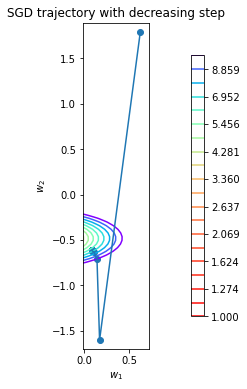

p = 0.7 || Gradient value = [ 11.79654146 -20.90763288]


<ipython-input-8-3748ecc47fda>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


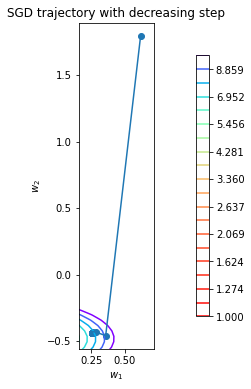

p = 1 || Gradient value = [14.14042296  6.9218962 ]


In [14]:
loss = MSELoss()

p_values = (0.1, 0.2, 0.5, 0.7, 1)

for p in p_values:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p)
    plot_gd(w_list, X, y, loss, "SGD trajectory with decreasing step")
    print(f"{p = } ||", f"Gradient value = {loss.calc_grad(X, y, w_list[-1])}")

* Функция $n_t$ (длина шага) является убывающей, поэтому с увеличением $p$ длина шага убывает. Это говорит о том, что большое значение $p$ может помешать градиентному спуску прийти в 0. По визуализациям сложно определить зависимость между `p` и поведением градиента, т.к. большое значение имеет значение исходного градиента.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [22]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


#### Обновим определение `stochastic_gradient_descent` на не использующее `p`, выполнив соответствующуя ячейку.

In [23]:
loss = MSELoss()

GD_path = gradient_descent(w_init, X, y, loss, 0.001, 100)
SGD_path = stochastic_gradient_descent(w_init, X, y, loss, 0.001, 10, 100)

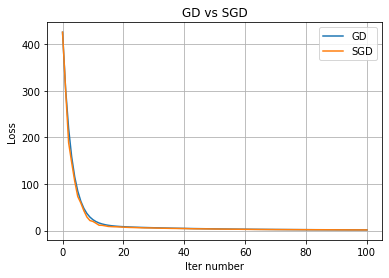

In [25]:
size_losses = len(GD_path)

GD_losses =  np.zeros([size_losses])
SGD_losses = np.zeros([size_losses])

for i in range(size_losses):
    GD_losses[i] =  loss.calc_loss(X, y,  GD_path[i])
    SGD_losses[i] = loss.calc_loss(X, y, SGD_path[i])

plt.plot(np.arange(0, size_losses), GD_losses, label="GD")
plt.plot(np.arange(0, size_losses), SGD_losses, label="SGD")
plt.title("GD vs SGD")
plt.legend()
plt.xlabel("Iter number")
plt.ylabel("Loss")
plt.grid(True)

plt.show()

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [26]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w_init = np.zeros(X.shape[1])
        
        w_list = gradient_descent(w_init, X, y, self.loss, self.lr)
        
        self.w = w_list[-1]
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [27]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [28]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [29]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
X_raw = X_raw.drop(["index"], axis=1)

In [30]:
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

**Источники**:
> https://github.com/V-Marco/hse_iad4_2022/blob/main/seminar_6/solved_sem06_linreg.ipynb

### Закодируем категориальные переменные

In [31]:
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


* В 0 столбце *symboling: -3, -2, -1, 0, 1, 2, 3* - категориальная переменная, поэтому сделаем её "object"-переменной:

In [32]:
X_raw.iloc[:, 0] = X_raw.iloc[:, 0].apply(lambda x: str(x))

In [33]:
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [34]:
cat_features_mask = (X_raw.dtypes == "object").values

In [35]:
X_raw_categorial = X_raw[X_raw.columns[cat_features_mask]]

In [36]:
X_raw_categorial

,0,2,3,4,5,6,7,8,14,15,17
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
196,-1,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
197,-1,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
198,-1,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
199,-1,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [37]:
X_raw_real = X_raw[X_raw.columns[~cat_features_mask]]

In [38]:
X_raw_real

,1,9,10,11,12,13,16,18,19,20,21,22,23,24
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28
197,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25
198,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23
199,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27


In [39]:
X_raw_categorial = pd.get_dummies(X_raw_categorial, drop_first=True)

In [40]:
X_raw_categorial

,0_-2,0_0,0_1,0_2,0_3,2_audi,2_bmw,2_chevrolet,2_dodge,2_honda,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
X = pd.concat([X_raw_real, X_raw_categorial], axis=1)

In [42]:
X

,1,9,10,11,12,13,16,18,19,20,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
197,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
198,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
199,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


Т.к. `X.columns` остаются неизменными, сохраним структуру в `cat_features_mask`:

In [43]:
cat_features_mask = np.array([False] * X_raw_real.shape[1] + [True] * X_raw_categorial.shape[1])

### Разделим датасет на обучающую и тестовую выборку

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

In [45]:
print(f"{X_train.shape = }, {X_test.shape = }, {y_train.shape = }, {y_test.shape = }")

X_train.shape = (140, 68), X_test.shape = (61, 68), y_train.shape = (140,), y_test.shape = (61,)


### Заполним пропуски в датасете 

In [46]:
X_train.isnull().any().any() or X_test.isnull().any().any()

True

In [47]:
from sklearn.impute import SimpleImputer

# для вещественнозначных признаков заполним пропуски средними
X_real_train = X_train[X_train.columns[~cat_features_mask]]
X_real_test  = X_test[X_test.columns[~cat_features_mask]]

mis_replacer = SimpleImputer(strategy="mean").fit(X_real_train)

X_no_mis_real_train = pd.DataFrame(data=mis_replacer.transform(X_real_train), columns=X_real_train.columns, index=X_real_train.index)
X_no_mis_real_test = pd.DataFrame(data=mis_replacer.transform(X_real_test), columns=X_real_test.columns, index=X_real_test.index)

In [48]:
# для категориальных - пустыми строками
X_cat_train = X_train[X_train.columns[cat_features_mask]].fillna("")
X_cat_test = X_test[X_test.columns[cat_features_mask]].fillna("")

X_train = pd.concat([X_no_mis_real_train, X_cat_train], axis=1)
X_test = pd.concat([X_no_mis_real_test, X_cat_test], axis=1)

X_train

,1,9,10,11,12,13,16,18,19,20,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
96,106.0,97.2,173.4,65.2,54.7,2324.0,120.0,3.33,3.47,8.5,...,0,0,0,1,0,0,0,0,0,0
181,94.0,97.3,171.7,65.5,55.7,2212.0,109.0,3.19,3.40,9.0,...,0,0,0,0,0,0,0,1,0,0
19,81.0,94.5,158.8,63.6,52.0,1909.0,90.0,3.03,3.11,9.6,...,0,0,0,1,0,0,0,0,0,0
153,91.0,95.7,166.3,64.4,52.8,2109.0,98.0,3.19,3.03,9.0,...,0,0,0,1,0,0,0,0,0,0
92,128.0,94.5,165.6,63.8,53.3,2028.0,97.0,3.15,3.29,9.4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,93.0,115.6,202.6,71.7,56.3,3770.0,183.0,3.58,3.64,21.5,...,0,0,0,0,0,1,0,0,0,0
192,103.0,104.3,188.8,67.2,56.2,2935.0,141.0,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
117,154.0,93.7,157.3,63.8,50.6,1967.0,90.0,2.97,3.23,9.4,...,0,0,0,1,0,0,0,0,0,0
47,104.0,93.1,159.1,64.2,54.1,1890.0,91.0,3.03,3.15,9.0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
X_train.isnull().any().any() or X_test.isnull().any().any() # No spaces left

False

### Нормализуем вещественные значения

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_real_train = X_train[X_train.columns[~cat_features_mask]]
X_real_test  = X_test[X_test.columns[~cat_features_mask]]

scaler = scaler.fit(X_real_train)

X_train_scaled = scaler.transform(X_real_train)
X_real_train = pd.DataFrame(data=X_train_scaled, columns=X_real_train.columns, index=X_train.index)

X_test_scaled = scaler.transform(X_real_test)
X_real_test = pd.DataFrame(data=X_test_scaled, columns=X_real_test.columns, index=X_test.index)

X_train = pd.concat([X_real_train, X_cat_train], axis=1)
X_test = pd.concat([X_real_test, X_cat_test], axis=1)

In [51]:
X_train

,1,9,10,11,12,13,16,18,19,20,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
96,-0.483473,-0.261896,-0.049739,-0.300485,0.425635,-0.415623,-0.135410,-0.026965,0.743778,-0.376323,...,0,0,0,1,0,0,0,0,0,0
181,-0.840866,-0.244802,-0.192882,-0.155423,0.831831,-0.635450,-0.412343,-0.565709,0.512867,-0.231520,...,0,0,0,0,0,0,0,1,0,0
19,-1.228041,-0.723418,-1.279086,-1.074148,-0.671094,-1.230159,-0.890683,-1.181417,-0.443762,-0.057756,...,0,0,0,1,0,0,0,0,0,0
153,-0.930214,-0.518297,-0.647572,-0.687317,-0.346137,-0.837612,-0.689277,-0.565709,-0.707660,-0.231520,...,0,0,0,1,0,0,0,0,0,0
92,0.171747,-0.723418,-0.706514,-0.977440,-0.143039,-0.996593,-0.714453,-0.719636,0.150008,-0.115677,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-0.870648,2.883293,2.408955,2.842521,1.075549,2.422493,1.450664,0.935078,1.304560,3.388561,...,0,0,0,0,0,1,0,0,0,0
192,-0.572821,0.951737,1.246969,0.666594,1.034930,0.783608,0.393282,1.704712,-0.311814,-0.086716,...,0,0,0,0,0,0,0,1,0,0
117,0.946098,-0.860165,-1.405389,-0.977440,-1.239768,-1.116320,-0.890683,-1.412307,-0.047916,-0.115677,...,0,0,0,1,0,0,0,0,0,0
47,-0.543038,-0.962726,-1.253826,-0.784025,0.181918,-1.267451,-0.865507,-1.181417,-0.311814,-0.231520,...,0,0,0,1,0,0,0,0,0,0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [52]:
linear_regression_MSELoss = LinearRegression(MSELoss())

linear_regression_MSELoss = linear_regression_MSELoss.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [53]:
from sklearn.metrics import mean_squared_error

print("Train: %14.5f" % (mean_squared_error(y_train, linear_regression_MSELoss.predict(X_train))))
print("Test : %14.5f" % (mean_squared_error(y_test,  linear_regression_MSELoss.predict(X_test))))

Train:  1640235.02171
Test : 22751829.82138


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

- **Зануляем последний параметр, т.к. столбец единиц `hstack(...)'ом` присоединялся ПОСЛЕ таблицы объекты-признаки**

In [54]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        w_ = w[:-1]
        
        return np.linalg.norm(X.dot(w) - y) ** 2 / y.shape[0] + (np.linalg.norm(w_) ** 2) * self.coef
        
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        
        w_ = w.copy()
        w_[-1] = 0
       
        return X.T.dot(X.dot(w) - y) * 2 / y.shape[0] + 2 * self.coef * w_
    
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [55]:
linear_regression_MSEL2Loss = LinearRegression(MSEL2Loss(0.05))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [56]:
linear_regression_MSEL2Loss = linear_regression_MSEL2Loss.fit(X_train, y_train)

    Без регуляризации:
        Train:  1640235.02171
        Test : 22751829.82138

In [57]:
from sklearn.metrics import mean_squared_error

print("Train: %14.5f" % (mean_squared_error(y_train, linear_regression_MSEL2Loss.predict(X_train))))
print("Test : %14.5f" % (mean_squared_error(y_test,  linear_regression_MSEL2Loss.predict(X_test))))

Train:  4060383.24676
Test : 17657770.47132


In [58]:
%%time

reg_coefs = np.arange(0.00, 0.02, 0.001)

mses = []
for coef in reg_coefs:
    linear_regression_MSEL2Loss = LinearRegression(MSEL2Loss(coef))
    linear_regression_MSEL2Loss = linear_regression_MSEL2Loss.fit(X_train, y_train)
    mses.append(mean_squared_error(y_test,  linear_regression_MSEL2Loss.predict(X_test)))

Wall time: 22.9 s


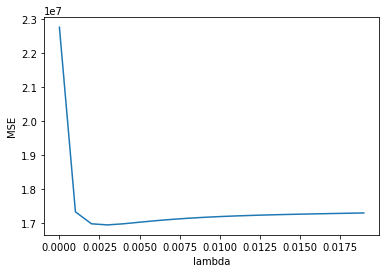

In [59]:
plt.plot(reg_coefs, mses)
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.show()

In [60]:
# Близкий к наилучшему доситижимому результату, с L2-регуляризацией  
linear_regression_MSEL2Loss = LinearRegression(MSEL2Loss(0.003)).fit(X_train, y_train)

print("Train: %14.5f" % (mean_squared_error(y_train, linear_regression_MSEL2Loss.predict(X_train))))
print("Test : %14.5f" % (mean_squared_error(y_test,  linear_regression_MSEL2Loss.predict(X_test))))

Train:  1977136.26511
Test : 16948212.69669


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [61]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
        
    
    def phi_loss(self, z):
        return np.where((-self.eps < z) & (z < (self.eps)), (z ** 2) / 2, self.eps * (np.abs(z) - self.eps / 2))
    
   
    def phi_grad(self, z):
        return np.where((-self.eps < z) & (z < self.eps), z, self.eps * np.sign(z))

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """

        return np.array(list(np.apply_along_axis(self.phi_loss, 0, (X.dot(w) - y)))).mean()
        
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        
        phi_s_column = np.apply_along_axis(self.phi_grad, 0, (X.dot(w) - y)).reshape(-1, 1)
        
        res = np.sum(np.multiply(X, phi_s_column), axis=0) / X.shape[0]

        return res

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

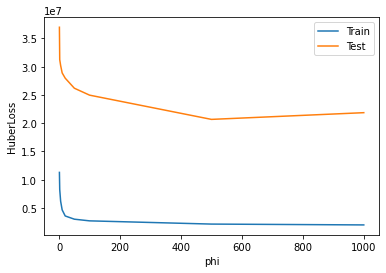

In [45]:
from sklearn.metrics import mean_squared_error

phis = [1, 2, 5, 10, 20, 50, 100, 500, 1000]

train = []
test  = []

for phi in phis:
    linear_regression_HuberLoss = LinearRegression(HuberLoss(phi))
    linear_regression_HuberLoss = linear_regression_HuberLoss.fit(X_train, y_train)

    train.append(mean_squared_error(y_train, linear_regression_HuberLoss.predict(X_train)))
    test.append(mean_squared_error(y_test,  linear_regression_HuberLoss.predict(X_test)))

plt.plot(phis, train, label="Train")
plt.plot(phis, test, label="Test")
plt.xlabel("phi")
plt.ylabel("HuberLoss")
plt.legend()
plt.show()

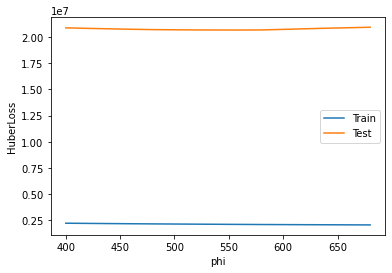

In [46]:
phis = np.arange(400, 700, 20)

train = []
test  = []

for phi in phis:
    linear_regression_HuberLoss = LinearRegression(HuberLoss(phi))
    linear_regression_HuberLoss = linear_regression_HuberLoss.fit(X_train, y_train)

    train.append(mean_squared_error(y_train, linear_regression_HuberLoss.predict(X_train)))
    test.append(mean_squared_error(y_test,  linear_regression_HuberLoss.predict(X_test)))

plt.plot(phis, train, label="Train")
plt.plot(phis, test, label="Test")
plt.xlabel("phi")
plt.ylabel("HuberLoss")
plt.legend()
plt.show()

In [47]:
best_index = np.argmin(np.array(test))

In [48]:
[phi for phi in phis][best_index] # Наиболее оптимальное значение phi.

560

    Без регуляризации (MSE):
        Train:  1640235.02171
        Test : 22751829.82138

In [49]:
print("Train: %14.5f" % (np.array(train)[best_index]))
print("Test:  %14.5f" % (np.array(test)[best_index]))  # Получили снижение loss'a!!!

Train:  2116017.67205
Test:  20654973.04909


- Таким образом, мы улучшили наш результат на тестовой выборке, чуть потеряв в работе с обучающей.

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

**Источники**:
> https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0
> https://habr.com/ru/post/209610/

In [66]:
def _decrease_temperature(iter_number: int, T_0: float):
    return T_0 * 0.1 / iter_number

In [67]:
def simulated_annealing(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, T_0: float = 1000, Tmin: float = 10):
    np.random.seed(0)
    Tmin = 10
    T = T_0
    
    trace = []
    w = w_init    
    trace.append(w)
    
    step = 0
    
    while T >= Tmin:
        mse_old = loss.calc_loss(X, y, w)
        new_w = w + np.random.standard_t(3, size=w.shape)
        mse_new = loss.calc_loss(X, y, new_w)
        if mse_new - mse_old <= 0:
            w = new_w
        else:
            probability_of_move = np.exp(-(mse_new - mse_old) / T)
            if np.random.uniform(0, 1) <= probability_of_move:
                w = new_w
        
        step += 1
        
        T = _decrease_temperature(step, T_0)
        
        trace.append(w)
                    
            
    return trace
    

In [68]:
class LinearRegressionSA:
    def __init__(self, loss: BaseLoss, T_0: float = 1_000_000) -> None:
        self.loss = loss
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w_init = np.zeros(X.shape[1])
        
        w_list = simulated_annealing(w_init, X, y, self.loss, T_0, 10)
        
        self.w = w_list[-1]
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        return np.dot(X, self.w)

In [146]:
t = [1, 10, 100, 1000, 10_000, 100_000, 1_000_000, 10_000_000, 100_000_000]

train = []
test = []

for T_0 in t:
    linear_regression_MSELoss_SA = LinearRegressionSA(MSELoss(), T_0).fit(X_train, y_train)

    train.append((mean_squared_error(y_train, linear_regression_MSELoss_SA.predict(X_train)), T_0))
    test.append((mean_squared_error(y_test, linear_regression_MSELoss_SA.predict(X_test)), T_0))


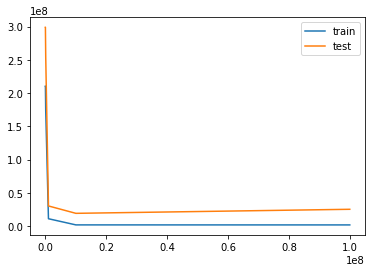

In [147]:
train = np.array(train)
test = np.array(test)

plt.plot(train[:, 1], train[:, 0], label="train")
plt.plot(test[:, 1], test[:, 0], label="test")
plt.xlabel("$T_0$")
plt.ylabel("MSELoss")
plt.legend()
plt.show()

In [153]:
t = np.arange(1, 40_000_000, 1000000)

train = []
test = []

for T_0 in t:
    linear_regression_MSELoss_SA = LinearRegressionSA(MSELoss(), T_0).fit(X_train, y_train)

    train.append((mean_squared_error(y_train, linear_regression_MSELoss_SA.predict(X_train)), T_0))
    test.append((mean_squared_error(y_test, linear_regression_MSELoss_SA.predict(X_test)), T_0))


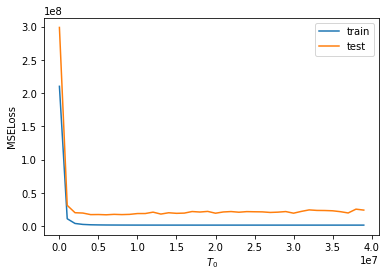

In [154]:
train = np.array(train)
test = np.array(test)

plt.plot(train[:, 1], train[:, 0], label="train")
plt.plot(test[:, 1], test[:, 0], label="test")
plt.xlabel("$T_0$")
plt.ylabel("MSELoss")
plt.legend()
plt.show()

In [189]:
t = np.arange(100000, 4_000_000, 100000)

train = []
test = []

for T_0 in t:
    linear_regression_MSELoss_SA = LinearRegressionSA(MSELoss(), T_0).fit(X_train, y_train)

    train.append((mean_squared_error(y_train, linear_regression_MSELoss_SA.predict(X_train)), T_0))
    test.append((mean_squared_error(y_test, linear_regression_MSELoss_SA.predict(X_test)), T_0))


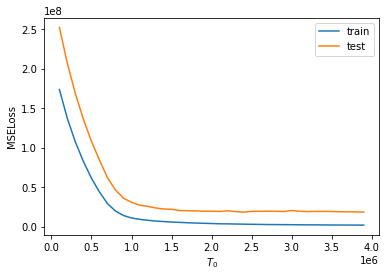

In [190]:
train = np.array(train)
test = np.array(test)

plt.plot(train[:, 1], train[:, 0], label="train")
plt.plot(test[:, 1], test[:, 0], label="test")
plt.xlabel("$T_0$")
plt.ylabel("MSELoss")
plt.legend()
plt.show()

In [191]:
best_T_0 = np.argmin(test[:, 0])

In [192]:
# Близкое к минимальному значение MSELoss при прочих равных условиях и оптимальном T_0
test[best_T_0][0]

18594985.206711516

    Без регуляризации (MSE):
        Train:  1640235.02171
        Test : 22751829.82138

In [193]:
from sklearn.metrics import mean_squared_error
np.random.seed(0)
linear_regression_MSELoss_SA = LinearRegressionSA(MSELoss(), test[best_T_0][1]).fit(X_train, y_train)

print("При T_0 = %d:" % (test[best_T_0][1]))
print("Train: %14.5f" % (mean_squared_error(y_train, linear_regression_MSELoss_SA.predict(X_train))))
print("Test : %14.5f" % (mean_squared_error(y_test,  linear_regression_MSELoss_SA.predict(X_test))))

При T_0 = 3900000:
Train:  2201712.09716
Test : 18594985.20671


* Т.е. мы добились улучшения на тестовой выборке.